<a href="https://colab.research.google.com/github/diaputr/machine-learning/blob/main/Kuis1_Kelompok3_Agus_Diah_Fariz_Haikal_Widya_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NO 1**

**1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset**
**MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!**

In [ ]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# import numpy
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

# metrics accuracy with multinominal naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from imblearn.under_sampling import RandomUnderSampler

# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

import seaborn as sns

In [ ]:
mnist = fetch_openml('mnist_784', version=1, parser="auto", as_frame=False)

In [ ]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
# Mendapatkan data gambar dan label
X, y = mnist.data, mnist.target

In [ ]:
unique_labels, count = np.unique(y, return_counts=True)

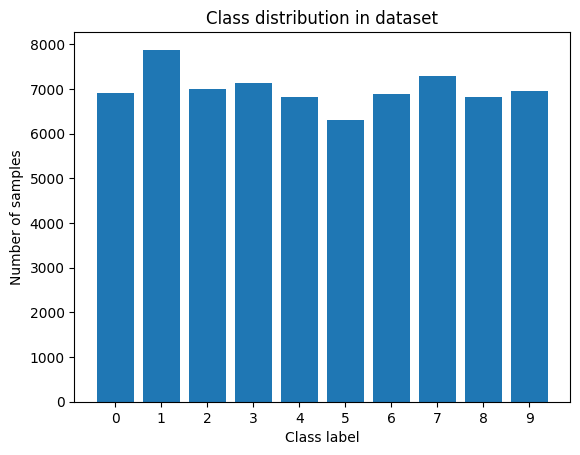

In [ ]:
plt.bar(unique_labels, count)
plt.xlabel("Class label")
plt.ylabel("Number of samples")
plt.title("Class distribution in dataset")
plt.show()

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create RandomUnderSampler object
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [ ]:
# Fit and transform the training set
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [ ]:
# Train KNN classifier on the balanced sample of the training set
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

# Evaluate the model on the test set
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.97      0.97      1380
           3       0.97      0.96      0.96      1433
           4       0.97      0.96      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.93      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



**Penjelasan : berdasarkan hasil yang ada, dapat disimpulkan bahwa data ini relatif seimbang, dan memiliki hasil evaluasi model yang baik dengan presisi dan recall yang tinggi untuk setiap kelas.**

# **NO 2**

**2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat
menggunakan referensi dari Job Sheet 03.**

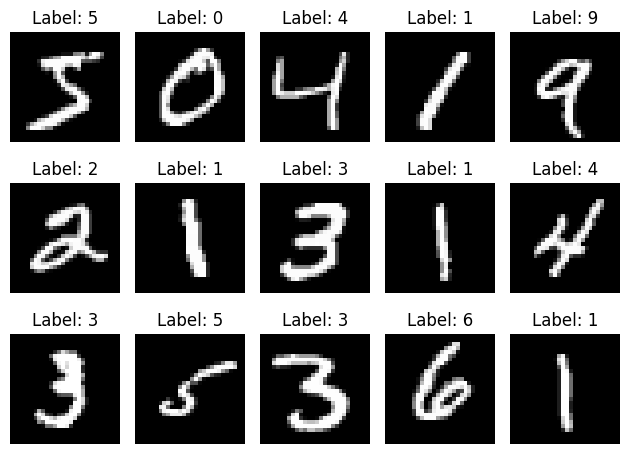

In [ ]:
# Menampilkan 15 gambar pertama beserta labelnya
num_images_to_show = 15
for i in range(num_images_to_show):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**Penjelasan : Jadi, keseluruhan kode ini digunakan untuk menampilkan 15 gambar pertama yang ada di dataset beserta labelnya dalam kotak-kotak kecil . Ini membantu untuk melihat data dengan lebih baik.**

# **NO 3**

**3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk**

- **Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai
fitur.**
- **Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda
diperbolehkan melakukan ekspolarasi pada proses ini.**

In [ ]:
# Pilih 5 citra untuk dihitung histogramnya
num_display = 5

In [ ]:
# menghitung histogram untuk 5 citra pertama
histograms = np.array([np.histogram(image.reshape(28, 28), bins=256, range=(0, 256))[0]
                       for image in X[:num_display]])

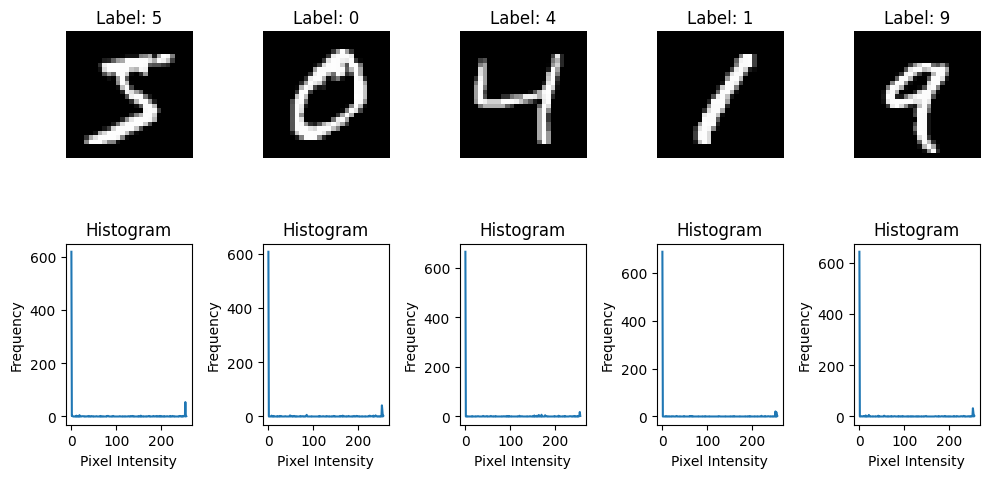

In [ ]:
# membuat size canvas
plt.figure(figsize=(10, 7))

for i in range(num_display):
    plt.subplot(3, num_display, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

    plt.subplot(3, num_display, num_display + i + 1)
    plt.plot(histograms[i])
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Penjelasan: kode program ini digunakan untuk menampilkan 5 gambar angka pertama yang ada di dalam dataset. Kemudian setiap masing-masing dari ke 5 angka tersebut di hitung histogramnya yang bertujuan untuk melihat intensitas warna/tingkat kecerahan pada piksel gambar angka. Hingga pada akhirnya akan di tampilkan ke 5 gambar angka pertama beserta histogramnya.**

# **NO 4**

**4.  Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.**

In [ ]:
# Rasio 70:30
x_train_70, x_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

# Rasio 80:20
x_train_80, x_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

# Rasio 90:10
x_train_90, x_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)

# Cek ukuran data
print("Ukuran data training dan testing (70:30):")
print("Data training:", x_train_70.shape[0])
print("Data testing:", x_test_70.shape[0])

print("\nUkuran data training dan testing (80:20):")
print("Data training:", x_train_80.shape[0])
print("Data testing:", x_test_80.shape[0])

print("\nUkuran data training dan testing (90:10):")
print("Data training:", x_train_90.shape[0])
print("Data testing:", x_test_90.shape[0])

Ukuran data training dan testing (70:30):
Data training: 49000
Data testing: 21000

Ukuran data training dan testing (80:20):
Data training: 56000
Data testing: 14000

Ukuran data training dan testing (90:10):
Data training: 63000
Data testing: 7000


**Penjelasan : hasil dari kode tersebut memberikan informasi tentang berapa banyak data yang digunakan untuk melatih model (data pelatihan) dan berapa banyak data yang digunakan untuk menguji model (data pengujian) dalam tiga rasio yang berbeda. Jumlah sampel dan fitur dalam setiap data pelatihan dan pengujian berbeda sesuai dengan rasio yang telah ditentukan sebelumnya.**

# **NO 5**

**5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM**.


*   **Anda diperbolehkan untuk melakukan tunning parameter.**
*   **Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.**

## SVM 70:30

In [ ]:
# Import SVM classifier
from sklearn.svm import SVC
# Create SVC object and call fit function to train model
clf = SVC(kernel='linear')
clf.fit(x_test_70, y_test_70)

SVC(kernel='linear')

In [ ]:
# Show accuracy score
acc_70 = clf.score(x_test_70, y_pred_70)

In [ ]:
# Evaluasi model menggunakan data uji
y_pred_70 = clf.predict(x_test_70)

# Tampilkan metrik evaluasi
print("Classification Report:\n", classification_report(y_test_70, y_pred_70))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2058
           1       1.00      1.00      1.00      2364
           2       1.00      1.00      1.00      2133
           3       1.00      1.00      1.00      2176
           4       1.00      1.00      1.00      1936
           5       1.00      1.00      1.00      1915
           6       1.00      1.00      1.00      2088
           7       1.00      1.00      1.00      2248
           8       1.00      1.00      1.00      1992
           9       1.00      1.00      1.00      2090

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



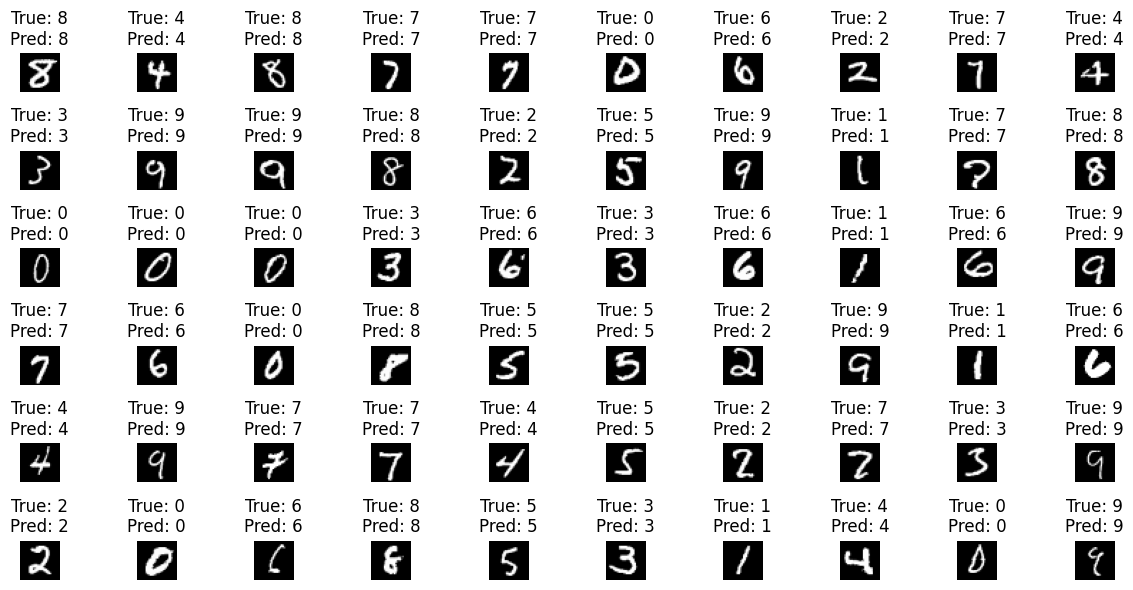

In [ ]:
# jumlah sample yang akan ditampilkan
n_samples = 60

# init jumlah predeksi yang salah
n_wrong = 0
# Display images with true labels and predicted labels
plt.figure(figsize=(12, 6))
for i in range(n_samples):
    plt.subplot(6, 10, i + 1)
    plt.imshow(x_test_70[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = y_test_70.iloc[i] if isinstance(y_test_70, pd.Series) else y_test_70[i]
    pred_label = y_pred_70.iloc[i] if isinstance(y_pred_70, pd.Series) else y_pred_70[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'
        n_wrong += 1

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

Text(113.9222222222222, 0.5, 'Prekdiksi label Test')

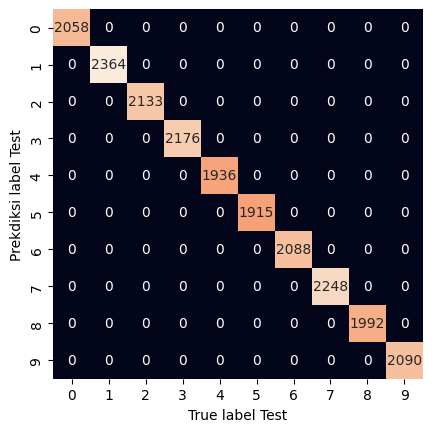

In [ ]:
mat_test = confusion_matrix(y_test_70, y_pred_70)
sns.heatmap(mat_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('True label Test')
plt.ylabel('Prekdiksi label Test')

## SVM 80:20

In [ ]:
# Create SVC object and call fit function to train model
clf = SVC(kernel='linear')
clf.fit(x_test_80, y_test_80)

SVC(kernel='linear')

In [ ]:
# Show accuracy score
acc_80 = clf.score(x_test_80, y_test_80)

In [ ]:
# Evaluasi model menggunakan data uji
y_pred_80 = clf.predict(x_test_80)

# Tampilkan metrik evaluasi
print("Classification Report:\n", classification_report(y_test_80, y_pred_80))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1343
           1       1.00      1.00      1.00      1600
           2       1.00      1.00      1.00      1380
           3       1.00      1.00      1.00      1433
           4       1.00      1.00      1.00      1295
           5       1.00      1.00      1.00      1273
           6       1.00      1.00      1.00      1396
           7       1.00      1.00      1.00      1503
           8       1.00      1.00      1.00      1357
           9       1.00      1.00      1.00      1420

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000



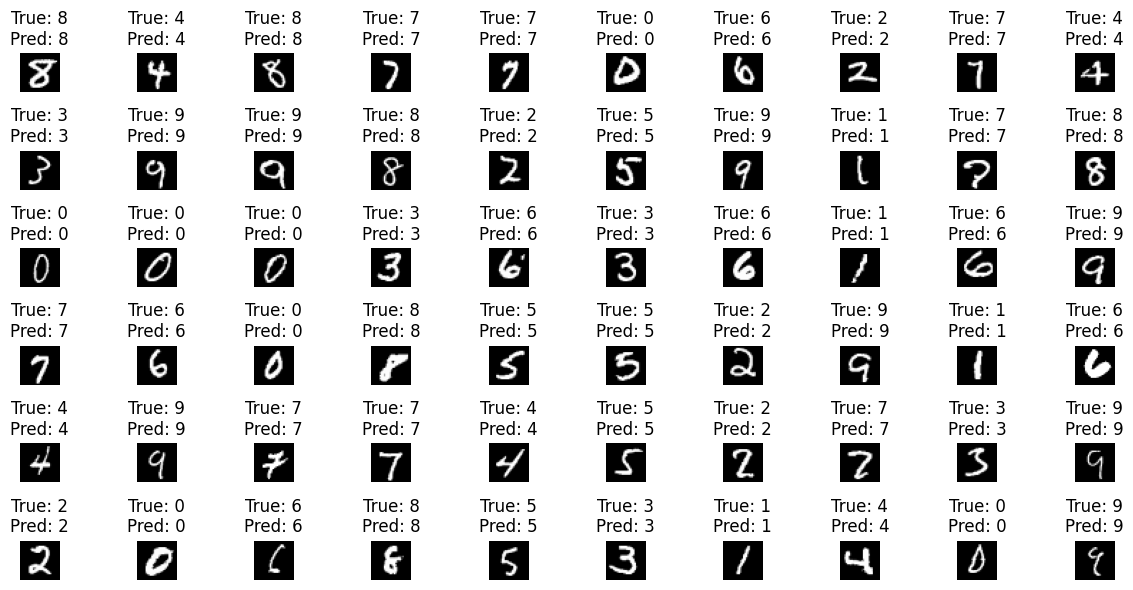

In [ ]:
# jumlah sample yang akan ditampilkan
n_samples = 60

# init jumlah predeksi yang salah
n_wrong = 0
# Display images with true labels and predicted labels
plt.figure(figsize=(12, 6))
for i in range(n_samples):
    plt.subplot(6, 10, i + 1)
    plt.imshow(x_test_80[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = y_test_80.iloc[i] if isinstance(y_test_80, pd.Series) else y_test_80[i]
    pred_label = y_pred_80.iloc[i] if isinstance(y_pred_80, pd.Series) else y_pred_80[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'
        n_wrong += 1

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

Text(113.9222222222222, 0.5, 'Prekdiksi label Test')

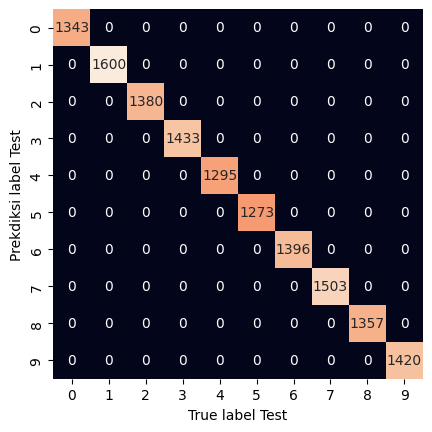

In [ ]:
mat_test = confusion_matrix(y_test_80, y_pred_80)
sns.heatmap(mat_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('True label Test')
plt.ylabel('Prekdiksi label Test')

## SVM 90:10

In [ ]:
# Create SVC object and call fit function to train model
clf = SVC(kernel='linear')
clf.fit(x_test_90, y_test_90)

SVC(kernel='linear')

In [ ]:
# Show accuracy score
acc_90 = clf.score(x_test_90, y_test_90)

In [ ]:
# Evaluasi model menggunakan data uji
y_pred_90 = clf.predict(x_test_90)

# Tampilkan metrik evaluasi
print("Classification Report:\n", classification_report(y_test_90, y_pred_90))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       683
           1       1.00      1.00      1.00       800
           2       1.00      1.00      1.00       674
           3       1.00      1.00      1.00       760
           4       1.00      1.00      1.00       611
           5       1.00      1.00      1.00       658
           6       1.00      1.00      1.00       677
           7       1.00      1.00      1.00       724
           8       1.00      1.00      1.00       693
           9       1.00      1.00      1.00       720

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



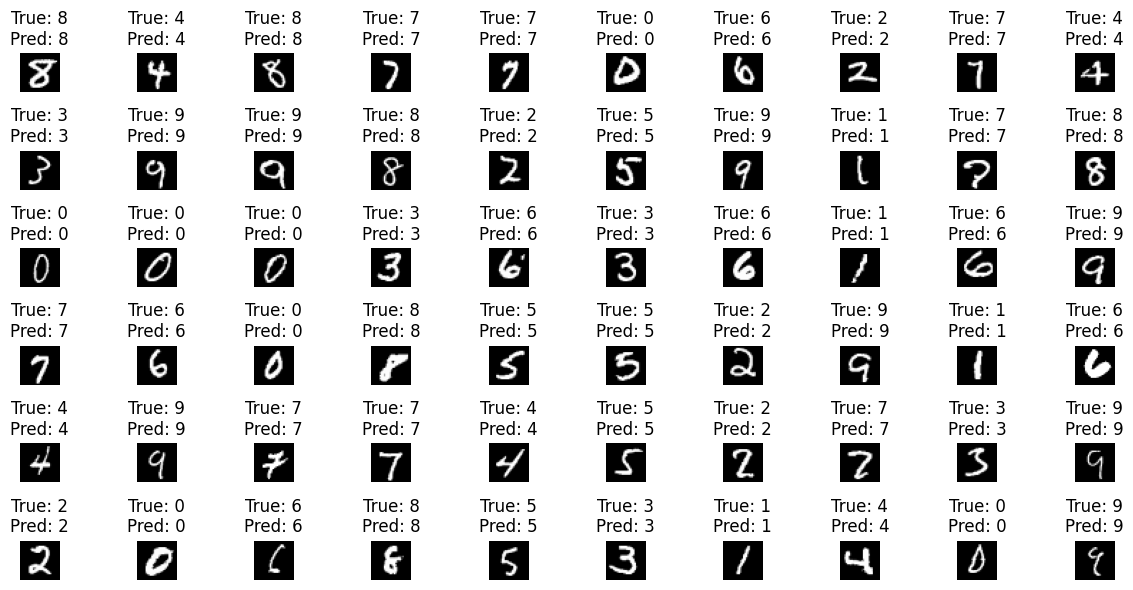

In [ ]:
# jumlah sample yang akan ditampilkan
n_samples = 60

# init jumlah predeksi yang salah
n_wrong = 0
# Display images with true labels and predicted labels
plt.figure(figsize=(12, 6))
for i in range(n_samples):
    plt.subplot(6, 10, i + 1)
    plt.imshow(x_test_90[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = y_test_90.iloc[i] if isinstance(y_test_90, pd.Series) else y_test_90[i]
    pred_label = y_pred_90.iloc[i] if isinstance(y_pred_90, pd.Series) else y_pred_90[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'
        n_wrong += 1

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

Text(113.9222222222222, 0.5, 'Prekdiksi label Test')

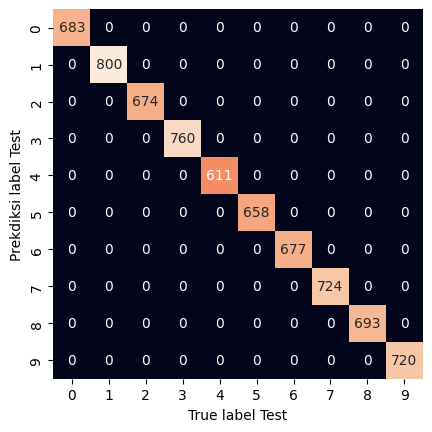

In [ ]:
mat_test = confusion_matrix(y_test_90, y_pred_90)
sns.heatmap(mat_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('True label Test')
plt.ylabel('Prekdiksi label Test')

**Penjelasan: Jadi, keseluruhan kode ini adalah tentang mengimpor, melatih, dan mengukur kinerja model SVM dalam konteks tugas klasifikasi. Model ini menggunakan kernel linear, yang berarti ia mencoba untuk membuat pemisahan linear antara berbagai kelas dalam data. Skor akurasi akan memberi tahu Anda sejauh mana model ini berhasil dalam memprediksi kelas-kelas dari data uji.**

## NB 70:30


In [ ]:
# inisialisai multinominal
mnb = MultinomialNB()

# fit model
mnb.fit(x_train_70, y_train_70)
mnb.fit(x_test_70, y_test_70)

# prediksi dengan data training
y_pred_train_70 = mnb.predict(x_train_70)
y_pred_test_70 = mnb.predict(x_test_70)

# Evaluasi akurasi data train dan test
acc_train_70 = accuracy_score(y_train_70, y_pred_train_70)
acc_test_70 = accuracy_score(y_test_70, y_pred_test_70)

# print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train_70}')
print(f'Hasil akurasi data test: {acc_test_70}')

Hasil akurasi data train: 0.8256122448979591
Hasil akurasi data test: 0.8263333333333334


In [ ]:
report_train = classification_report(y_train_70, y_pred_train_70)
report_test = classification_report(y_test_70, y_pred_test_70)

# print hasil evaluasi
print(f'Hasil klrifikasi report data train: \n{report_train}')
print(f'Hasil klrifikasi report data test: \n{report_test}')

Hasil klrifikasi report data train: 
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      4845
           1       0.89      0.93      0.91      5513
           2       0.88      0.83      0.85      4857
           3       0.80      0.81      0.81      4965
           4       0.82      0.74      0.78      4888
           5       0.85      0.67      0.75      4398
           6       0.88      0.91      0.90      4788
           7       0.94      0.82      0.88      5045
           8       0.65      0.78      0.71      4833
           9       0.69      0.83      0.75      4868

    accuracy                           0.83     49000
   macro avg       0.83      0.82      0.82     49000
weighted avg       0.83      0.83      0.83     49000

Hasil klrifikasi report data test: 
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2058
           1       0.89      0.93      0.91      2364
     

In [ ]:
# bentuk confusion matrix train and test
mat_train = confusion_matrix(y_train_70, y_pred_train_70)
mat_test = confusion_matrix(y_test_70, y_pred_test_70)

Text(113.9222222222222, 0.5, 'Prekdiksi label Train')

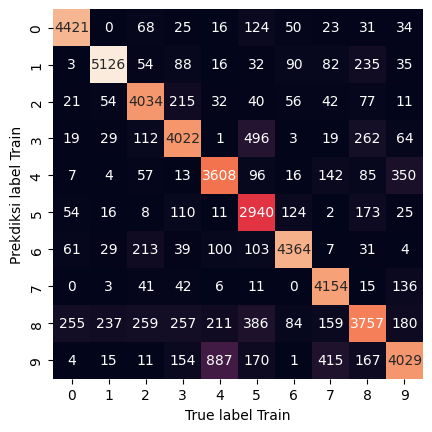

In [ ]:
sns.heatmap(mat_train.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('True label Train')
plt.ylabel('Prekdiksi label Train')

Text(113.9222222222222, 0.5, 'Prekdiksi label Test')

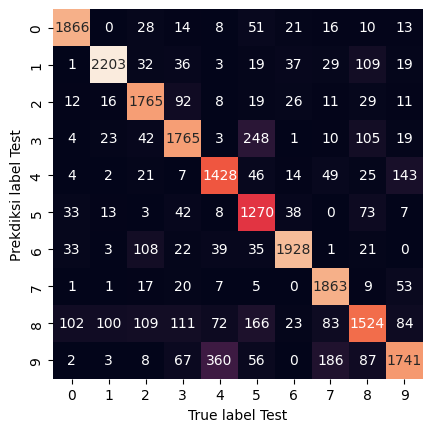

In [ ]:
sns.heatmap(mat_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('True label Test')
plt.ylabel('Prekdiksi label Test')

In [ ]:
import pandas as pd

# jumlah sample yang akan ditampilkan
n_samples = 60

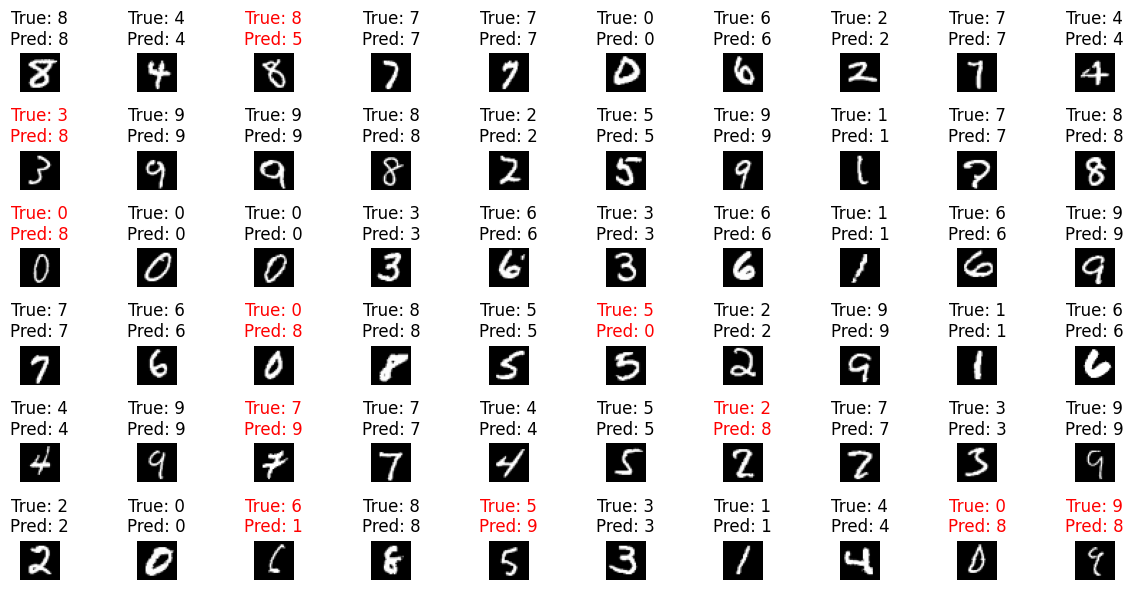

In [ ]:
# init jumlah predeksi yang salah
n_wrong = 0
# Display images with true labels and predicted labels
plt.figure(figsize=(12, 6))
for i in range(n_samples):
    plt.subplot(6, 10, i + 1)
    plt.imshow(x_test_70[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = y_test_70.iloc[i] if isinstance(y_test_70, pd.Series) else y_test_70[i]
    pred_label = y_pred_test_70.iloc[i] if isinstance(y_pred_test_70, pd.Series) else y_pred_test_70[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'
        n_wrong += 1

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
print(f'Akurasi Model: {(((n_samples-n_wrong)/n_samples)*100):.2f}%')

Akurasi Model: 81.67%


## NB 80:20

In [ ]:
# fit model
mnb.fit(x_train_80, y_train_80)
mnb.fit(x_test_80, y_test_80)

# prediksi dengan data training
y_pred_train_80 = mnb.predict(x_train_80)
y_pred_test_80 = mnb.predict(x_test_80)

# Evaluasi akurasi data train dan test
acc_train_80 = accuracy_score(y_train_80, y_pred_train_80)
acc_test_80 = accuracy_score(y_test_80, y_pred_test_80)

# print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train_80}')
print(f'Hasil akurasi data test: {acc_test_80}')

Hasil akurasi data train: 0.8250357142857143
Hasil akurasi data test: 0.8299285714285715


In [ ]:
report_train = classification_report(y_train_80, y_pred_train_80)
report_test = classification_report(y_test_80, y_pred_test_80)

# print hasil evaluasi
print(f'Hasil klrifikasi report data train: \n{report_train}')
print(f'Hasil klrifikasi report data test: \n{report_test}')

Hasil klrifikasi report data train: 
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      5560
           1       0.89      0.93      0.91      6277
           2       0.88      0.83      0.85      5610
           3       0.80      0.81      0.80      5708
           4       0.83      0.74      0.78      5529
           5       0.85      0.67      0.75      5040
           6       0.88      0.92      0.90      5480
           7       0.95      0.82      0.88      5790
           8       0.64      0.77      0.70      5468
           9       0.69      0.83      0.75      5538

    accuracy                           0.83     56000
   macro avg       0.83      0.82      0.82     56000
weighted avg       0.83      0.83      0.83     56000

Hasil klrifikasi report data test: 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1343
           1       0.88      0.93      0.91      1600
     

In [ ]:
# bentuk confusion matrix train and test
mat_train = confusion_matrix(y_train_80, y_pred_train_80)
mat_test = confusion_matrix(y_test_80, y_pred_test_80)

Text(113.9222222222222, 0.5, 'Prekdiksi label Train')

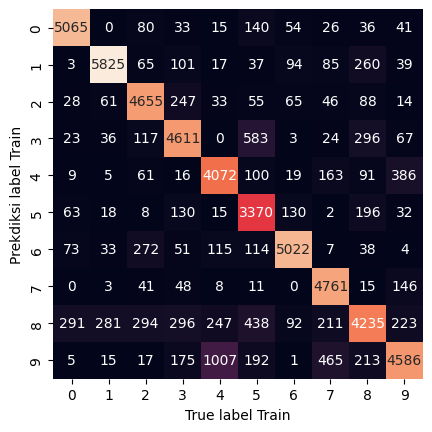

In [ ]:
sns.heatmap(mat_train.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('True label Train')
plt.ylabel('Prekdiksi label Train')

Text(113.9222222222222, 0.5, 'Prekdiksi label Test')

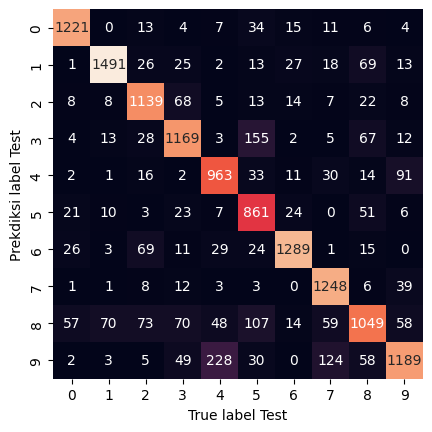

In [ ]:
sns.heatmap(mat_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('True label Test')
plt.ylabel('Prekdiksi label Test')

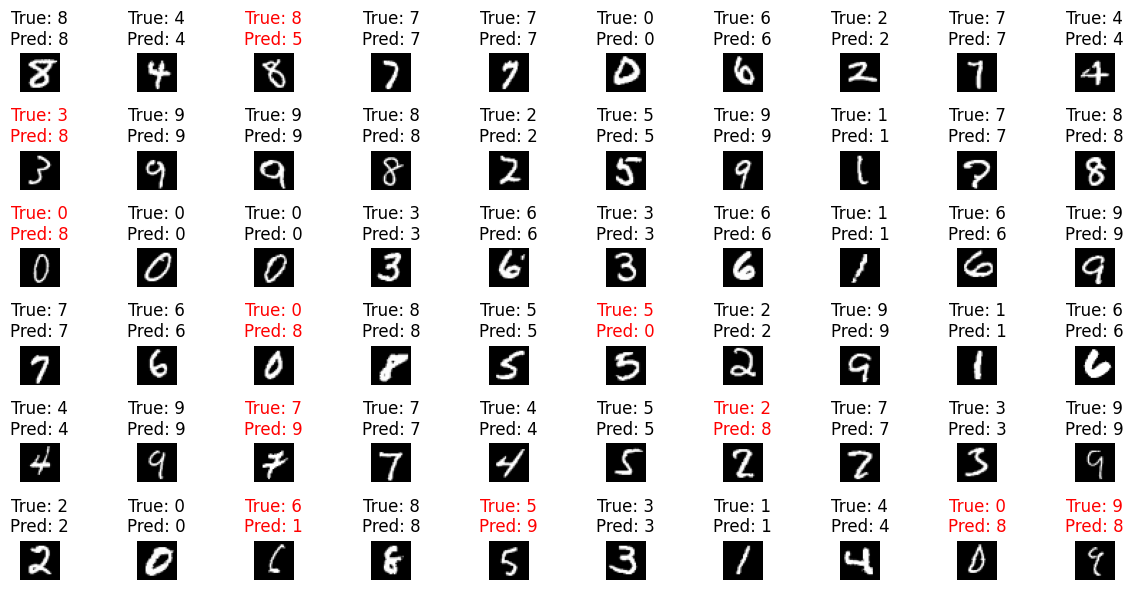

In [ ]:
# jumlah sample yang akan ditampilkan
n_samples = 60

# init jumlah predeksi yang salah
n_wrong = 0
# Display images with true labels and predicted labels
plt.figure(figsize=(12, 6))
for i in range(n_samples):
    plt.subplot(6, 10, i + 1)
    plt.imshow(x_test_80[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = y_test_80.iloc[i] if isinstance(y_test_80, pd.Series) else y_test_80[i]
    pred_label = y_pred_test_80.iloc[i] if isinstance(y_pred_test_80, pd.Series) else y_pred_test_80[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'
        n_wrong += 1

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
print(f'Akurasi Model: {(((n_samples-n_wrong)/n_samples)*100):.2f}%')

Akurasi Model: 81.67%


## NB 90:10

In [ ]:
# fit model
mnb.fit(x_train_90, y_train_90)
mnb.fit(x_test_90, y_test_90)

# prediksi dengan data training
y_pred_train_90 = mnb.predict(x_train_90)
y_pred_test_90 = mnb.predict(x_test_90)

# Evaluasi akurasi data train dan test
acc_train_90 = accuracy_score(y_train_90, y_pred_train_90)
acc_test_90 = accuracy_score(y_test_90, y_pred_test_90)

# print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train_90}')
print(f'Hasil akurasi data test: {acc_test_90}')

Hasil akurasi data train: 0.8255555555555556
Hasil akurasi data test: 0.8318571428571429


In [ ]:
report_train = classification_report(y_train_90, y_pred_train_90)
report_test = classification_report(y_test_90, y_pred_test_90)

# print hasil evaluasi
print(f'Hasil klrifikasi report data train: \n{report_train}')
print(f'Hasil klrifikasi report data test: \n{report_test}')

Hasil klrifikasi report data train: 
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      6220
           1       0.89      0.93      0.91      7077
           2       0.88      0.83      0.85      6316
           3       0.81      0.81      0.81      6381
           4       0.82      0.73      0.77      6213
           5       0.85      0.67      0.75      5655
           6       0.88      0.92      0.90      6199
           7       0.94      0.83      0.88      6569
           8       0.64      0.79      0.71      6132
           9       0.69      0.82      0.75      6238

    accuracy                           0.83     63000
   macro avg       0.83      0.82      0.82     63000
weighted avg       0.83      0.83      0.83     63000

Hasil klrifikasi report data test: 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       683
           1       0.87      0.93      0.90       800
     

In [ ]:
# bentuk confusion matrix train and test
mat_train = confusion_matrix(y_train_90, y_pred_train_90)
mat_test = confusion_matrix(y_test_90, y_pred_test_90)

Text(113.9222222222222, 0.5, 'Prekdiksi label Train')

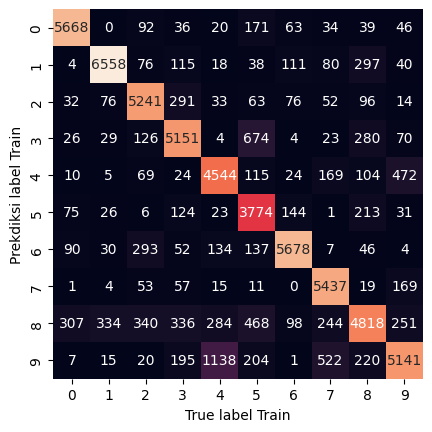

In [ ]:
sns.heatmap(mat_train.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('True label Train')
plt.ylabel('Prekdiksi label Train')

Text(113.9222222222222, 0.5, 'Prekdiksi label Test')

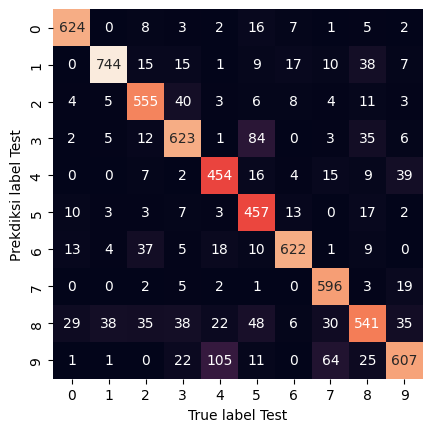

In [ ]:
sns.heatmap(mat_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('True label Test')
plt.ylabel('Prekdiksi label Test')

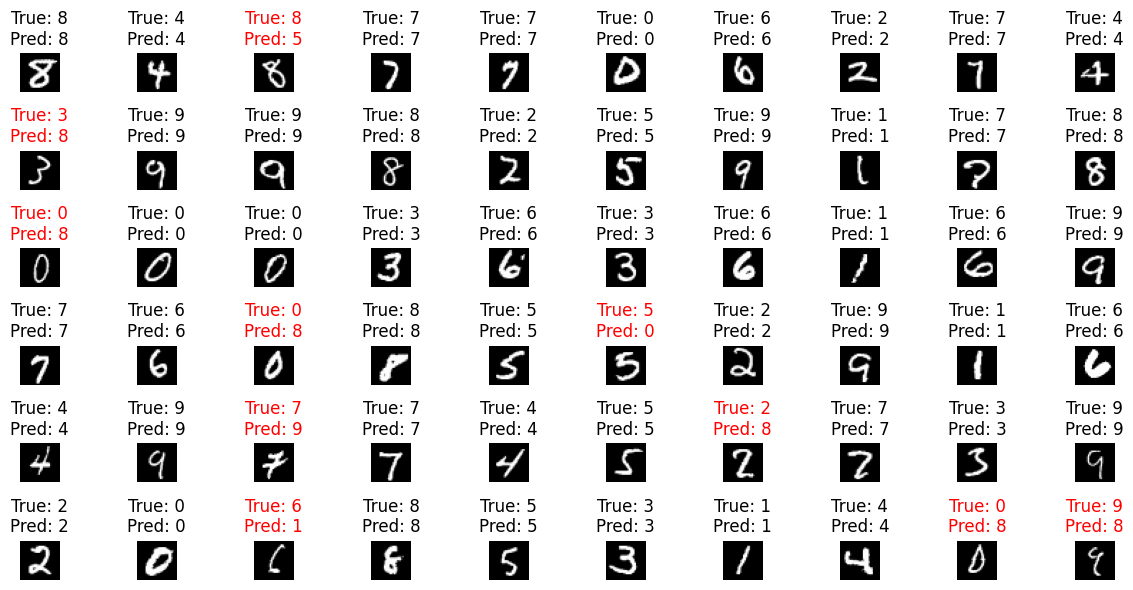

In [ ]:
# jumlah sample yang akan ditampilkan
n_samples = 60

# init jumlah predeksi yang salah
n_wrong = 0
# Display images with true labels and predicted labels
plt.figure(figsize=(12, 6))
for i in range(n_samples):
    plt.subplot(6, 10, i + 1)
    plt.imshow(x_test_90[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = y_test_90.iloc[i] if isinstance(y_test_90, pd.Series) else y_test_90[i]
    pred_label = y_pred_test_90.iloc[i] if isinstance(y_pred_test_90, pd.Series) else y_pred_test_90[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'
        n_wrong += 1

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
print(f'Akurasi Model: {(((n_samples-n_wrong)/n_samples)*100):.2f}%')

Akurasi Model: 83.33%


# **HASIL**

**Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!**

In [ ]:
print(f'Akurasi SVM 70:30 : {acc_70}')
print(f'Akurasi SVM 80:20 : {acc_80}')
print(f'Akurasi SVM 90:10 : {acc_90}')

print(f'\nAkurasi Naive Bayes 70:30 : {acc_test_70:.4f}')
print(f'Akurasi Naive Bayes 80:20 : {acc_test_80:.4f}')
print(f'Akurasi Naive Bayes 90:10 : {acc_test_90:.4f}')

Akurasi SVM 70:30 : 1.0
Akurasi SVM 80:20 : 1.0
Akurasi SVM 90:10 : 1.0

Akurasi Naive Bayes 70:30 : 0.8263
Akurasi Naive Bayes 80:20 : 0.8299
Akurasi Naive Bayes 90:10 : 0.8319


**Jadi model terbaik adalah SVM kernel linear dengan tingkat akurasi mencapai 100%. Konfigurasi model SVM yang digunakan disini adalah dengan kernel linier dalam arti SVM mencoba membuat pemisahan linier anatara kelas-kelas dalam data. Untuk tingkat akurasinya SVM sebesar 100.00% pada tingkat testing, sedangkan Naive Bayes memiliki tingkat akurasi 83.19%.**